# 1. Setup

In [3]:
!pip install python-kraken-sdk
!conda install -c conda-forge pandas mplfinance -y

Retrieving ndone
Channels:
 - conda-forge
 - defaults
Platform: osx-arm64
doneecting package metadata (repodata.json): - 
doneing environment: | 

# All requested packages already installed.



In [73]:
!pip install python-dotenv

  Using cached python_dotenv-1.0.1-py3-none-any.whl.metadata (23 kB)
Using cached python_dotenv-1.0.1-py3-none-any.whl (19 kB)


In [80]:
from dotenv import load_dotenv
import os

# Load environment variables from .env file
load_dotenv()

# Get API keys
apikey = os.getenv("API_KEY")
secret = os.getenv("API_SECRET")

In [81]:
from kraken.spot import Market
import pandas as pd
import mplfinance as mpf

# 2. Authenticate

In [79]:
# Initialize the Market client with your API keys
client = Market(apikey,
                secret)
print("Imported and initialized successfully!")

Imported and initialized successfully!


# 3. Get Tickets

In [6]:
# Get popular USD pairs
pairs = client.get_asset_pairs()
popular_coins = ['XXBT', 'XETH', 'XXRP', 'XDG', 'XLTC', 'XXLM', 'XXMR', 'LINK', 'ATOM', 'ALGO']
usd_pairs = []
for pair in pairs.keys():
    if pair.endswith('ZUSD'):
        base_asset = pair[:-4]
    elif pair.endswith('USD'):
        base_asset = pair[:-3]
    else:
        continue
    if base_asset in popular_coins:
        usd_pairs.append(pair)

print("Selected USD pairs:", usd_pairs)

Selected USD pairs: ['ALGOUSD', 'ATOMUSD', 'LINKUSD', 'XDGUSD', 'XETHZUSD', 'XLTCZUSD', 'XXBTZUSD', 'XXLMZUSD', 'XXMRZUSD', 'XXRPZUSD']


In [7]:
usd_pairs = ['ALGOUSD', 'ATOMUSD', 'LINKUSD', 'XDGUSD', 'XETHZUSD', 'XLTCZUSD', 'XXBTZUSD', 'XXLMZUSD', 'XXMRZUSD', 'XXRPZUSD']

ticker_data = []
for pair in usd_pairs:
    ticker = client.get_ticker(pair=pair) 
    last_price = round(float(ticker[pair]['c'][0]), 2) 
    ticker_data.append({'Symbol': pair, 'price': last_price})

print(ticker_data)

[{'Symbol': 'ALGOUSD', 'price': 0.24}, {'Symbol': 'ATOMUSD', 'price': 4.41}, {'Symbol': 'LINKUSD', 'price': 16.77}, {'Symbol': 'XDGUSD', 'price': 0.21}, {'Symbol': 'XETHZUSD', 'price': 2192.31}, {'Symbol': 'XLTCZUSD', 'price': 105.29}, {'Symbol': 'XXBTZUSD', 'price': 88629.6}, {'Symbol': 'XXLMZUSD', 'price': 0.29}, {'Symbol': 'XXMRZUSD', 'price': 225.53}, {'Symbol': 'XXRPZUSD', 'price': 2.5}]


In [8]:
ticker_df = pd.DataFrame(ticker_data)
ticker_df.head()

,Symbol,price
0,ALGOUSD,0.24
1,ATOMUSD,4.41
2,LINKUSD,16.77
3,XDGUSD,0.21
4,XETHZUSD,2192.31


In [9]:
ticker_df.tail()

,Symbol,price
5,XLTCZUSD,105.29
6,XXBTZUSD,88629.60
7,XXLMZUSD,0.29
8,XXMRZUSD,225.53
9,XXRPZUSD,2.50


In [10]:
ticker_df.set_index('Symbol', inplace=True)

In [11]:
float(ticker_df.loc['ALGOUSD', 'price'])

0.24

In [12]:
ticker_df.head()

,price
Symbol,
ALGOUSD,0.24
ATOMUSD,4.41
LINKUSD,16.77
XDGUSD,0.21
XETHZUSD,2192.31


# 4. Get Depth

In [13]:
depth = client.get_order_book(pair='XXBTZUSD')
print(depth)

{'XXBTZUSD': {'asks': [['88629.70000', '14.171', 1741373499], ['88629.80000', '0.151', 1741373498], ['88630.30000', '2.840', 1741373496], ['88630.60000', '0.127', 1741373497], ['88631.10000', '0.004', 1741373489], ['88631.70000', '2.821', 1741373493], ['88635.00000', '5.642', 1741373494], ['88635.40000', '1.601', 1741373494], ['88635.60000', '5.642', 1741373495], ['88635.80000', '0.079', 1741373496], ['88636.50000', '0.452', 1741373487], ['88638.60000', '0.237', 1741373489], ['88641.00000', '0.019', 1741373486], ['88641.30000', '0.001', 1741372823], ['88641.70000', '0.002', 1741373493], ['88641.80000', '1.694', 1741373500], ['88641.90000', '5.641', 1741373489], ['88642.20000', '0.982', 1741373498], ['88643.30000', '0.011', 1741372936], ['88645.40000', '3.103', 1741373493], ['88646.40000', '5.641', 1741373494], ['88647.50000', '0.237', 1741373486], ['88648.00000', '0.001', 1741373499], ['88648.10000', '0.001', 1741373475], ['88649.20000', '1.805', 1741373486], ['88650.00000', '0.007', 1

In [14]:
depth

{'XXBTZUSD': {'asks': [['88629.70000', '14.171', 1741373499],
   ['88629.80000', '0.151', 1741373498],
   ['88630.30000', '2.840', 1741373496],
   ['88630.60000', '0.127', 1741373497],
   ['88631.10000', '0.004', 1741373489],
   ['88631.70000', '2.821', 1741373493],
   ['88635.00000', '5.642', 1741373494],
   ['88635.40000', '1.601', 1741373494],
   ['88635.60000', '5.642', 1741373495],
   ['88635.80000', '0.079', 1741373496],
   ['88636.50000', '0.452', 1741373487],
   ['88638.60000', '0.237', 1741373489],
   ['88641.00000', '0.019', 1741373486],
   ['88641.30000', '0.001', 1741372823],
   ['88641.70000', '0.002', 1741373493],
   ['88641.80000', '1.694', 1741373500],
   ['88641.90000', '5.641', 1741373489],
   ['88642.20000', '0.982', 1741373498],
   ['88643.30000', '0.011', 1741372936],
   ['88645.40000', '3.103', 1741373493],
   ['88646.40000', '5.641', 1741373494],
   ['88647.50000', '0.237', 1741373486],
   ['88648.00000', '0.001', 1741373499],
   ['88648.10000', '0.001', 17413734

In [15]:
# Create DataFrame from bids
depth_df = pd.DataFrame(depth['XXBTZUSD']['bids'])
depth_df.columns = ['Price', 'Volume', 'Timestamp']  # Include all 3 elements
depth_df = depth_df[['Price', 'Volume']]  # Keep only Price and Volume per your example
depth_df.head()

,Price,Volume
0,88629.60000,0.033
1,88606.60000,0.004
2,88568.50000,0.001
3,88568.40000,5.646
4,88566.40000,5.646


In [16]:
depth_df.dtypes

Price     object
Volume    object
dtype: object

# 5. Get Historical Data

In [ ]:
## NEW CODE

In [41]:
from datetime import datetime

# Set start date to January 1, 2025
start_date = int(datetime(2025, 1, 1).timestamp())
print("Start date timestamp (January 1, 2025):", start_date) 

Start date timestamp (January 1, 2025): 1735704000


In [42]:
# Get historical OHLC data for XXBTZUSD starting from January 1, 2025
historical = client.get_ohlc(pair='XXBTZUSD', interval=1440, since=start_date)

# Check the raw timestamps to confirm
print("Raw timestamps:", [row[0] for row in historical['XXBTZUSD'][:5]])
print("First few entries:", historical['XXBTZUSD'][:5])

Raw timestamps: [1735776000, 1735862400, 1735948800, 1736035200, 1736121600]
First few entries: [[1735776000, '94380.9', '97719.9', '94167.2', '96805.2', '96494.6', '1727.87834504', 40932], [1735862400, '96805.3', '98888.0', '96034.1', '98111.1', '97693.7', '1520.22829624', 32349], [1735948800, '98111.1', '98714.8', '97548.4', '98208.9', '97996.0', '630.75266227', 23359], [1736035200, '98208.9', '98750.0', '97250.0', '98306.2', '97970.2', '437.30434173', 18687], [1736121600, '98306.3', '102479.6', '97974.0', '102222.0', '100991.5', '2276.11065977', 50951]]


In [43]:
# Extract the OHLC data for XXBTZUSD
ohlc_data = historical['XXBTZUSD']

# Create DataFrame
hist_df = pd.DataFrame(ohlc_data, columns=['Open Time', 'Open', 'High', 'Low', 'Close', 'VWAP', 'Volume', 'Trades'])
hist_df.head()

,Open Time,Open,High,Low,Close,VWAP,Volume,Trades
0,1735776000,94380.9,97719.9,94167.2,96805.2,96494.6,1727.87834504,40932
1,1735862400,96805.3,98888.0,96034.1,98111.1,97693.7,1520.22829624,32349
2,1735948800,98111.1,98714.8,97548.4,98208.9,97996.0,630.75266227,23359
3,1736035200,98208.9,98750.0,97250.0,98306.2,97970.2,437.30434173,18687
4,1736121600,98306.3,102479.6,97974.0,102222.0,100991.5,2276.11065977,50951


In [44]:
# Convert 'Open Time' from Unix timestamp (seconds) to datetime
hist_df['Time'] = pd.to_datetime(hist_df['Open Time'], unit='s', utc=True)
print("DataFrame shape:", hist_df.shape)
hist_df.head()

DataFrame shape: (65, 9)


,Open Time,Open,High,Low,Close,VWAP,Volume,Trades,Time
0,1735776000,94380.9,97719.9,94167.2,96805.2,96494.6,1727.87834504,40932,2025-01-02 00:00:00+00:00
1,1735862400,96805.3,98888.0,96034.1,98111.1,97693.7,1520.22829624,32349,2025-01-03 00:00:00+00:00
2,1735948800,98111.1,98714.8,97548.4,98208.9,97996.0,630.75266227,23359,2025-01-04 00:00:00+00:00
3,1736035200,98208.9,98750.0,97250.0,98306.2,97970.2,437.30434173,18687,2025-01-05 00:00:00+00:00
4,1736121600,98306.3,102479.6,97974.0,102222.0,100991.5,2276.11065977,50951,2025-01-06 00:00:00+00:00


In [45]:
historical

{'XXBTZUSD': [[1735776000,
   '94380.9',
   '97719.9',
   '94167.2',
   '96805.2',
   '96494.6',
   '1727.87834504',
   40932],
  [1735862400,
   '96805.3',
   '98888.0',
   '96034.1',
   '98111.1',
   '97693.7',
   '1520.22829624',
   32349],
  [1735948800,
   '98111.1',
   '98714.8',
   '97548.4',
   '98208.9',
   '97996.0',
   '630.75266227',
   23359],
  [1736035200,
   '98208.9',
   '98750.0',
   '97250.0',
   '98306.2',
   '97970.2',
   '437.30434173',
   18687],
  [1736121600,
   '98306.3',
   '102479.6',
   '97974.0',
   '102222.0',
   '100991.5',
   '2276.11065977',
   50951],
  [1736208000,
   '102222.0',
   '102759.3',
   '96100.0',
   '96932.2',
   '98488.5',
   '2322.87122789',
   46693],
  [1736294400,
   '96932.2',
   '97232.8',
   '92501.0',
   '95060.4',
   '94834.8',
   '2675.62697608',
   54862],
  [1736380800,
   '95060.1',
   '95251.1',
   '91168.5',
   '92531.7',
   '92924.8',
   '2567.92194993',
   46660],
  [1736467200,
   '92523.5',
   '95771.2',
   '92200.0',


In [46]:
# Extract the OHLC data for XXBTZUSD
ohlc_data = historical['XXBTZUSD']

In [47]:
# Create DataFrame from the OHLC data list
hist_df = pd.DataFrame(ohlc_data)
hist_df.head()

,0,1,2,3,4,5,6,7
0,1735776000,94380.9,97719.9,94167.2,96805.2,96494.6,1727.87834504,40932
1,1735862400,96805.3,98888.0,96034.1,98111.1,97693.7,1520.22829624,32349
2,1735948800,98111.1,98714.8,97548.4,98208.9,97996.0,630.75266227,23359
3,1736035200,98208.9,98750.0,97250.0,98306.2,97970.2,437.30434173,18687
4,1736121600,98306.3,102479.6,97974.0,102222.0,100991.5,2276.11065977,50951


In [48]:
hist_df.columns = ['Open Time', 'Open', 'High', 'Low', 'Close', 'VWAP', 'Volume', 'Trades']

In [49]:
hist_df.head()

,Open Time,Open,High,Low,Close,VWAP,Volume,Trades
0,1735776000,94380.9,97719.9,94167.2,96805.2,96494.6,1727.87834504,40932
1,1735862400,96805.3,98888.0,96034.1,98111.1,97693.7,1520.22829624,32349
2,1735948800,98111.1,98714.8,97548.4,98208.9,97996.0,630.75266227,23359
3,1736035200,98208.9,98750.0,97250.0,98306.2,97970.2,437.30434173,18687
4,1736121600,98306.3,102479.6,97974.0,102222.0,100991.5,2276.11065977,50951


In [50]:
hist_df.shape

(65, 8)

In [51]:
hist_df.dtypes

Open Time     int64
Open         object
High         object
Low          object
Close        object
VWAP         object
Volume       object
Trades        int64
dtype: object

# 6. Preprocess Historical Data 

In [52]:
# Convert Time column from Unix timestamp (seconds) to datetime
hist_df['Time'] = pd.to_datetime(hist_df['Open Time'], unit='s', utc=True)

In [53]:
hist_df.head()

,Open Time,Open,High,Low,Close,VWAP,Volume,Trades,Time
0,1735776000,94380.9,97719.9,94167.2,96805.2,96494.6,1727.87834504,40932,2025-01-02 00:00:00+00:00
1,1735862400,96805.3,98888.0,96034.1,98111.1,97693.7,1520.22829624,32349,2025-01-03 00:00:00+00:00
2,1735948800,98111.1,98714.8,97548.4,98208.9,97996.0,630.75266227,23359,2025-01-04 00:00:00+00:00
3,1736035200,98208.9,98750.0,97250.0,98306.2,97970.2,437.30434173,18687,2025-01-05 00:00:00+00:00
4,1736121600,98306.3,102479.6,97974.0,102222.0,100991.5,2276.11065977,50951,2025-01-06 00:00:00+00:00


In [54]:
# Drop 'Open Time' column and reorder with 'Time' first
hist_df = hist_df.drop(columns=['Open Time'])  # Remove 'Open Time'
cols = ['Time'] + [col for col in hist_df.columns if col != 'Time']  # Put 'Time' first
hist_df = hist_df[cols]  # Reorder columns
hist_df.head()

,Time,Open,High,Low,Close,VWAP,Volume,Trades
0,2025-01-02 00:00:00+00:00,94380.9,97719.9,94167.2,96805.2,96494.6,1727.87834504,40932
1,2025-01-03 00:00:00+00:00,96805.3,98888.0,96034.1,98111.1,97693.7,1520.22829624,32349
2,2025-01-04 00:00:00+00:00,98111.1,98714.8,97548.4,98208.9,97996.0,630.75266227,23359
3,2025-01-05 00:00:00+00:00,98208.9,98750.0,97250.0,98306.2,97970.2,437.30434173,18687
4,2025-01-06 00:00:00+00:00,98306.3,102479.6,97974.0,102222.0,100991.5,2276.11065977,50951


In [56]:
# Convert price and volume columns to float
numeric_columns = ['Open', 'High', 'Low', 'Close', 'VWAP', 'Volume']
hist_df[numeric_columns] = hist_df[numeric_columns].apply(pd.to_numeric)

# Check the updated data types
print(hist_df.dtypes)
hist_df.head()

Time      datetime64[ns, UTC]
Open                  float64
High                  float64
Low                   float64
Close                 float64
VWAP                  float64
Volume                float64
Trades                  int64
dtype: object


,Time,Open,High,Low,Close,VWAP,Volume,Trades
0,2025-01-02 00:00:00+00:00,94380.9,97719.9,94167.2,96805.2,96494.6,1727.878345,40932
1,2025-01-03 00:00:00+00:00,96805.3,98888.0,96034.1,98111.1,97693.7,1520.228296,32349
2,2025-01-04 00:00:00+00:00,98111.1,98714.8,97548.4,98208.9,97996.0,630.752662,23359
3,2025-01-05 00:00:00+00:00,98208.9,98750.0,97250.0,98306.2,97970.2,437.304342,18687
4,2025-01-06 00:00:00+00:00,98306.3,102479.6,97974.0,102222.0,100991.5,2276.110660,50951


In [57]:
hist_df.dtypes

Time      datetime64[ns, UTC]
Open                  float64
High                  float64
Low                   float64
Close                 float64
VWAP                  float64
Volume                float64
Trades                  int64
dtype: object

In [58]:
hist_df.describe()

,Open,High,Low,Close,VWAP,Volume,Trades
count,65.000000,65.000000,65.000000,65.000000,65.000000,65.000000,65.000000
mean,96950.436923,98787.080000,94587.386154,96857.410769,96791.621538,2260.543007,41226.400000
std,5333.904816,5393.857236,5967.973689,5432.152240,5615.491125,1534.367023,20369.860893
min,84089.900000,85061.000000,78219.000000,84089.800000,81562.900000,311.464905,13477.000000
25%,94698.900000,96483.000000,92501.000000,94698.800000,94576.100000,1188.388912,25176.000000
50%,96628.000000,98442.300000,95656.900000,96628.000000,97196.300000,1817.066330,36579.000000
75%,101191.000000,102748.600000,97688.700000,101191.100000,100393.900000,2992.563958,49992.000000
max,106162.800000,109112.000000,104250.000000,106162.800000,105315.200000,6144.710114,104134.000000


In [59]:
hist_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65 entries, 0 to 64
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype              
---  ------  --------------  -----              
 0   Time    65 non-null     datetime64[ns, UTC]
 1   Open    65 non-null     float64            
 2   High    65 non-null     float64            
 3   Low     65 non-null     float64            
 4   Close   65 non-null     float64            
 5   VWAP    65 non-null     float64            
 6   Volume  65 non-null     float64            
 7   Trades  65 non-null     int64              
dtypes: datetime64[ns, UTC](1), float64(6), int64(1)
memory usage: 4.2 KB


# 7. Viz

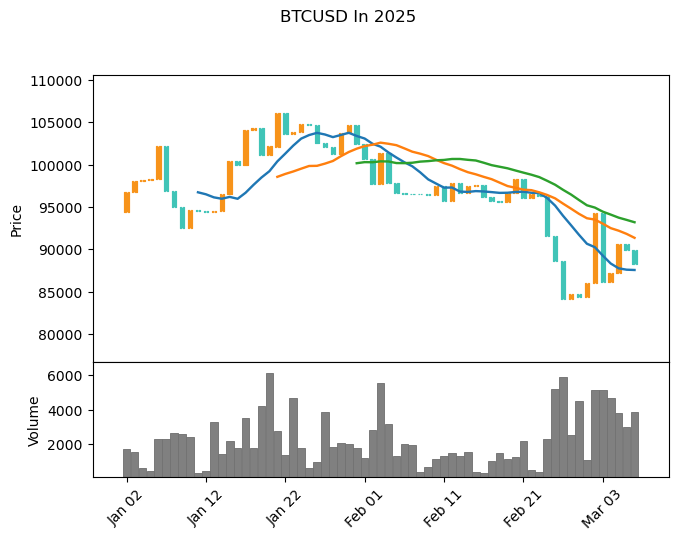

In [72]:
import mplfinance as mpf

# Custom style with vcdopcod included
custom_style = mpf.make_mpf_style(
    marketcolors={
        'candle': {'up': '#F7931A', 'down': '#40C4B7'},  # Orange up, Teal down
        'edge': {'up': '#F7931A', 'down': '#40C4B7'},
        'wick': {'up': '#FFFFFF', 'down': '#FFFFFF'},
        'ohlc': {'up': '#F7931A', 'down': '#40C4B7'},
        'volume': {'up': '#808080', 'down': '#808080'},
        'alpha': 1.0,  # Fully opaque
        'vcdopcod': False  # Fixed volume colors
    }
)

# Plot with the fixed style
mpf.plot(hist_df.set_index('Time').tail(100),
         type='candle',
         style=custom_style,
         volume=True,
         title='BTCUSD In 2025',
         mav=(10, 20, 30))

# The End
## By Sunil Makkar